# Final Processing
The final processing stage requires:
1. Quick validation of catalogues and Bayesian Pvalue maps
2. Skewness level
3. Adding flag to catalogue

In [1]:
import seaborn as sns
from astropy.table import Table
%matplotlib inline
import numpy as np
import pylab as plt

## Read tables

In [2]:
cat=Table.read('./data/dmu26_XID+SPIRE_SSDF_cat.fits')


In [3]:
cat[0:10]

<Table length=10>
          HELP_ID                   RA         ... Pval_res_350 Pval_res_500
                                 degrees       ...                          
          bytes27                float64       ...   float32      float32   
--------------------------- ------------------ ... ------------ ------------
HELP_J000436.836-604844.377 1.1534850499967266 ...        0.037        0.039
HELP_J000436.954-604832.515 1.1539747923964878 ...        0.063        0.946
HELP_J000437.006-604830.676 1.1541907923964878 ...        0.258        0.224
HELP_J000437.241-604829.390  1.155168779412869 ...        0.047        0.224
HELP_J000437.451-604825.942 1.1560457923964877 ...        0.047        0.224
HELP_J000437.912-604825.664 1.1579667923964878 ...        0.047        0.224
HELP_J000438.471-604831.846 1.1602937923964878 ...        0.176        0.224
HELP_J000440.003-604845.022 1.1666810257540317 ...        0.504        0.048
HELP_J000440.260-604843.056 1.1677507923964878 ...        0.504         0.05
HELP_J000445.006-604746.489 1.1875257923964877 ...        0.553        0.047

## Look at Symmetry of PDFs to determine depth level of catalogue

/home/mc741/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


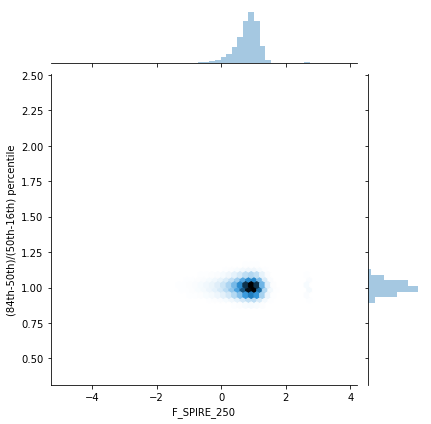

In [4]:
skew=(cat['FErr_SPIRE_250_u']-cat['F_SPIRE_250'])/(cat['F_SPIRE_250']-cat['FErr_SPIRE_250_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(cat['F_SPIRE_250']),y=skew, kind='hex')

/home/mc741/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


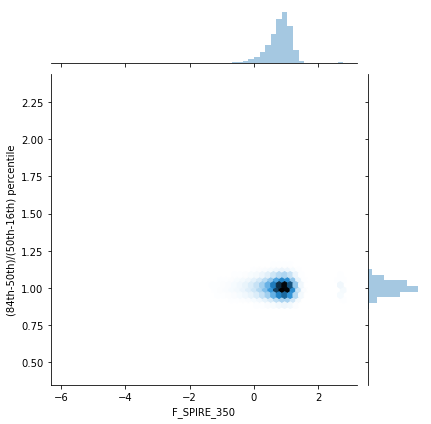

In [5]:
skew=(cat['FErr_SPIRE_350_u']-cat['F_SPIRE_350'])/(cat['F_SPIRE_350']-cat['FErr_SPIRE_350_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(cat['F_SPIRE_350']),y=skew, kind='hex')

/home/mc741/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


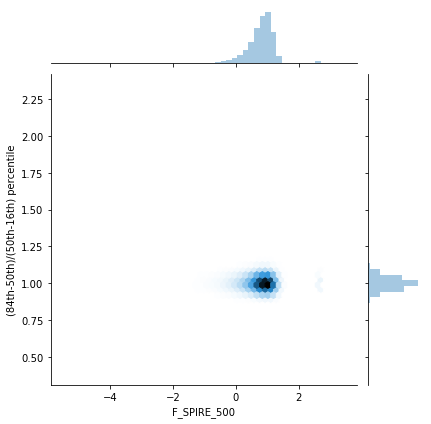

In [6]:
skew=(cat['FErr_SPIRE_500_u']-cat['F_SPIRE_500'])/(cat['F_SPIRE_500']-cat['FErr_SPIRE_500_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(cat['F_SPIRE_500']),y=skew, kind='hex')

## Add flag to catalogue

In [7]:
from astropy.table import Column
cat.add_column(Column(np.zeros(len(cat), dtype=bool),name='flag_spire_250'))
cat.add_column(Column(np.zeros(len(cat), dtype=bool),name='flag_spire_350'))
cat.add_column(Column(np.zeros(len(cat), dtype=bool),name='flag_spire_500'))

In [8]:
ind_250=(cat['Pval_res_250']>0.5)
ind_350=(cat['Pval_res_350']>0.5)
ind_500=(cat['Pval_res_500']>0.5)


In [9]:
print(ind_250.sum(),ind_350.sum(),ind_500.sum(),len(cat))

447286 449106 317064 4403019


In [10]:
cat['flag_spire_250'][ind_250]=True
cat['flag_spire_350'][ind_350]=True
cat['flag_spire_500'][ind_500]=True

In [11]:
cat.write('./data/dmu26_XID+SPIRE_SSDF_cat_20190930.fits', format='fits',overwrite=True)


In [12]:
ind_good=cat['flag_spire_250'] | cat['flag_spire_350'] | cat['flag_spire_500']

In [13]:
np.invert(ind_good).sum()

3427152

In [14]:
cat[np.invert(ind_good)][0:10]

<Table length=10>
          HELP_ID                   RA         ... flag_spire_350 flag_spire_500
                                 degrees       ...                              
          bytes27                float64       ...      bool           bool     
--------------------------- ------------------ ... -------------- --------------
HELP_J000436.836-604844.377 1.1534850499967266 ...          False          False
HELP_J000437.006-604830.676 1.1541907923964878 ...          False          False
HELP_J000437.241-604829.390  1.155168779412869 ...          False          False
HELP_J000437.451-604825.942 1.1560457923964877 ...          False          False
HELP_J000437.912-604825.664 1.1579667923964878 ...          False          False
HELP_J000438.471-604831.846 1.1602937923964878 ...          False          False
HELP_J000445.280-604818.828 1.1886657923964878 ...          False          False
HELP_J000445.351-604838.004  1.188962108813386 ...          False          False
HELP_J000445.507-604824.011 1.1896131810323576 ...          False          False
HELP_J000446.546-604834.373 1.1939427923964878 ...          False          False

Check PVal maps


In [3]:
import seaborn as sns
import aplpy
import matplotlib.pyplot as plt

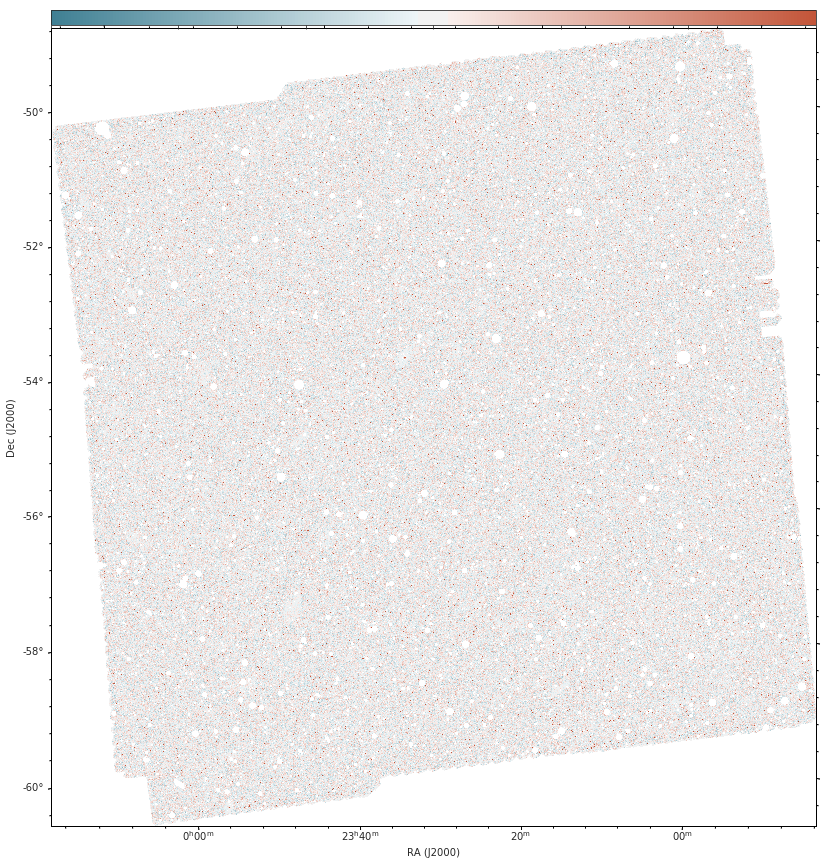

In [5]:
sns.set_style("white")
cmap = sns.diverging_palette(220, 20, as_cmap=True)

fig = plt.figure(figsize=(15, 15))
Bayes_p_map=aplpy.FITSFigure('./data/dmu26_XID+SPIRE_psw_SSDF_Bayes_Pval.fits', figure=fig)
Bayes_p_map.show_colorscale(vmin=-6, vmax=6, cmap=cmap)
Bayes_p_map.add_colorbar()
Bayes_p_map.colorbar.set_location('top')

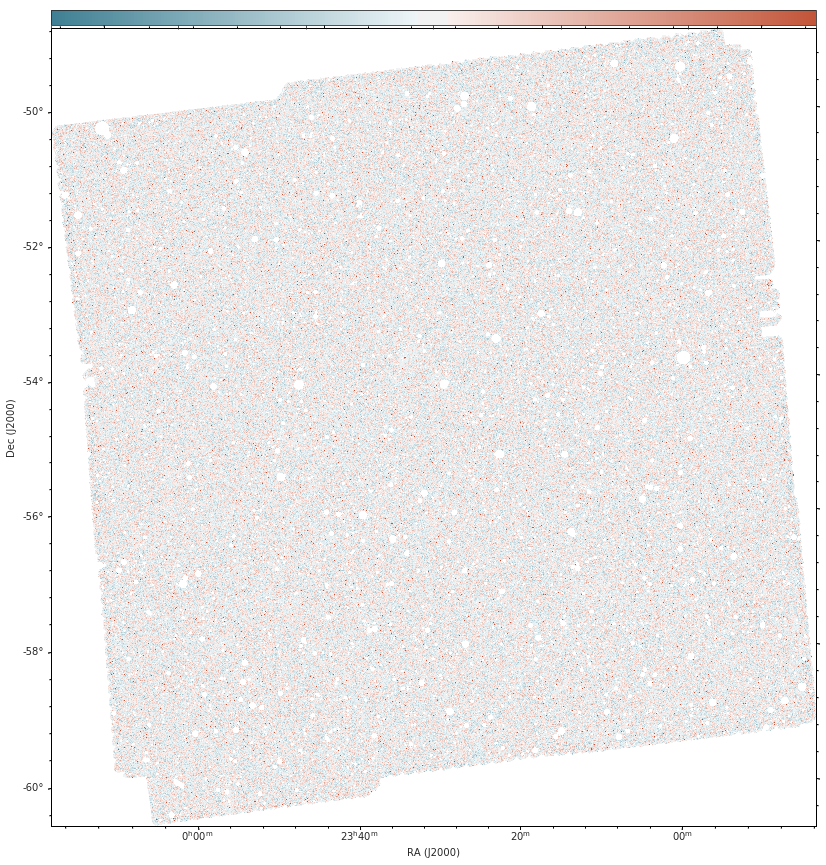

In [6]:
sns.set_style("white")
cmap = sns.diverging_palette(220, 20, as_cmap=True)

fig = plt.figure(figsize=(15, 15))
Bayes_p_map=aplpy.FITSFigure('./data/dmu26_XID+SPIRE_pmw_SSDF_Bayes_Pval.fits', figure=fig)
Bayes_p_map.show_colorscale(vmin=-6, vmax=6, cmap=cmap)
Bayes_p_map.add_colorbar()
Bayes_p_map.colorbar.set_location('top')

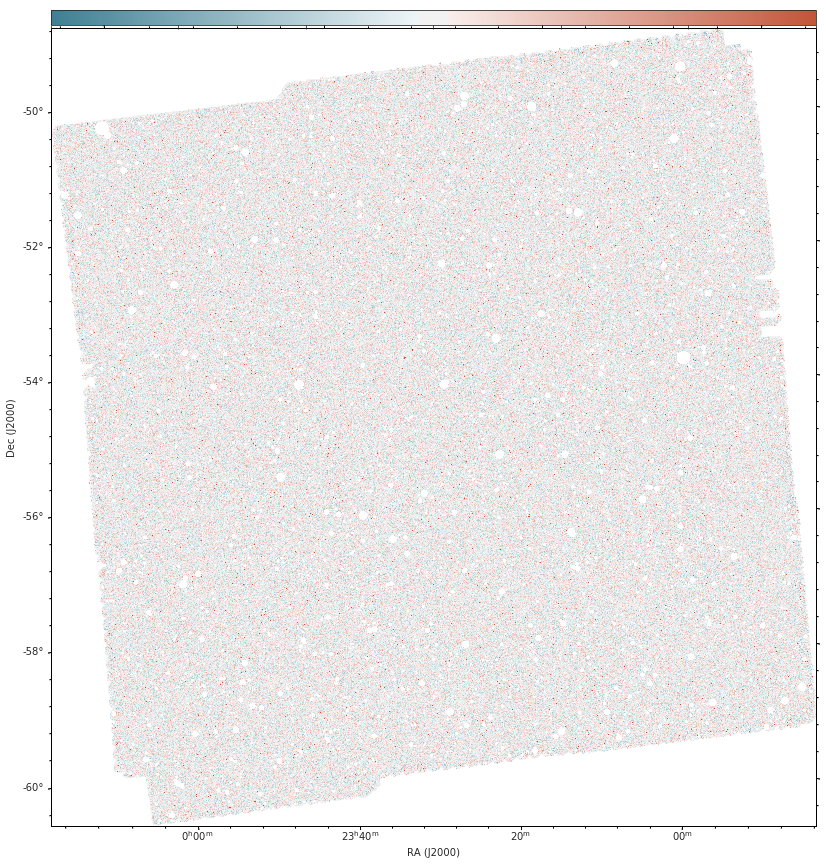

In [7]:
sns.set_style("white")
cmap = sns.diverging_palette(220, 20, as_cmap=True)

fig = plt.figure(figsize=(15, 15))
Bayes_p_map=aplpy.FITSFigure('./data/dmu26_XID+SPIRE_plw_SSDF_Bayes_Pval.fits', figure=fig)
Bayes_p_map.show_colorscale(vmin=-6, vmax=6, cmap=cmap)
Bayes_p_map.add_colorbar()
Bayes_p_map.colorbar.set_location('top')

In [5]:
import matplotlib.pyplot as plt

(array([0., 0., 0., ..., 0., 0., 2.]),
 array([   0,    1,    2, ..., 1997, 1998, 1999]),
 <a list of 1999 Patch objects>)

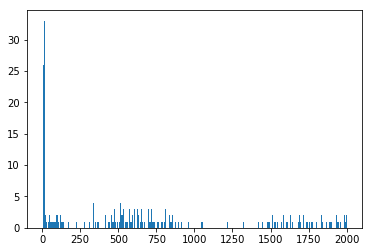

In [12]:
plt.hist(cat['n_eff_SPIRE_250'], bins=np.arange(0,2000,5))

In [19]:
print (len(cat), len(catEN2))

4403019 128252


In [36]:
catEN2['n_eff_MIPS_24'].isnull()

AttributeError: 'Column' object has no attribute 'isnull'

In [34]:
ind = cat[cat['n_eff_SPIRE_250'] np.array(column.isnull()

In [35]:
ind

'Nan'

In [14]:
catEN2=Table.read('../dmu26_XID+MIPS_ELAIS-N2/data/output/dmu26_XID+MIPS_ELAIS-N2_SWIRE_cat.fits')


(array([103., 119.,  89.,  40.,  47.,  32.,  25.,  25.,  19.,  13.,  15.,
         20.,  12.,  14.,  14.,  10.,  13.,  18.,   9.,   5.,   8.,   6.,
         10.,   7.,  17.,  16.,   7.,  12.,   4.,  10.,  12.,   5.,   7.,
         11.,  14.,   7.,   6.,  11.,   8.,  10.,   7.,   9.,  11.,  11.,
          7.,  11.,   4.,   8.,  13.,   8.,   7.,   7.,   6.,  11.,  16.,
         11.,  12.,  15.,   9.,   9.,  11.,   9.,  15.,   6.,  10.,   8.,
         10.,   6.,   9.,  10.,  11.,  14.,   8.,   9.,   5.,  20.,  13.,
         17.,   7.,   6.,   8.,   6.,  14.,  12.,  15.,   6.,  11.,  11.,
         10.,  14.,  10.,  14.,  16.,   9.,  11.,  15.,   7.,   9.,  16.,
         12.,  15.,   9.,   9.,  14.,   9.,  14.,   8.,  17.,  18.,  14.,
         15.,  11.,  15.,  10.,  14.,  15.,  17.,  18.,  15.,  13.,  12.,
         25.,  16.,  15.,  13.,  23.,  18.,   8.,  17.,  22.,  11.,  19.,
         15.,  13.,  15.,  13.,  16.,  21.,  19.,  25.,  28.,  20.,  13.,
         15.,  26.,  23.,  17.,  22., 

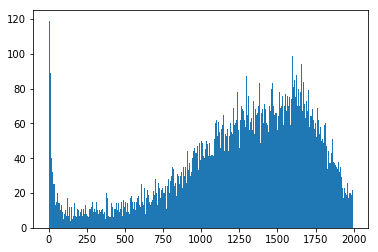

In [17]:
plt.hist(catEN2['n_eff_MIPS_24'], bins=np.arange(0,2000,5))